In [2]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory paths
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = ''
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))


print('Standard variables loaded, you are good to go!')

Standard variables loaded, you are good to go!


In [3]:
# import result data 

In [4]:
import os 
import pandas as pd
FINAL = '/Users/jonas/Documents/masters/thesis/thesis/data/final/'
paths_to_data = [FINAL + 'go_analysis/' + i for i in os.listdir(FINAL + 'go_analysis/')]

paths_to_data
list_of_data_objects = []
for i in paths_to_data:
    list_of_data_objects.append(pd.read_csv(i, delimiter='\t'))


In [30]:
# creating a list of all biological processes
bp = []
[bp.extend(list(list_of_data_objects[i][list_of_data_objects[i]["NS"] == "BP"]["name"])) \
     for i in range(0,len(list_of_data_objects))]
bp = set(bp)

# creating the corresponding matrix
bp_matrix = []
for i in list_of_data_objects:
    true_false = []
    for j in bp:
        if( j in list(i["name"])):
            true_false.append(1)
        else:
            true_false.append(0)
    bp_matrix.append(true_false)
bp_matrix = np.array(bp_matrix).T

# 
cc = []
[cc.extend(list(list_of_data_objects[i][list_of_data_objects[i]["NS"] == "CC"]["name"])) \
     for i in range(0,len(list_of_data_objects))]
cc = set(cc)

# creating the corresponding matrix
cc_matrix = []
for i in list_of_data_objects:
    true_false = []
    for j in cc:
        if( j in list(i["name"])):
            true_false.append(1)
        else:
            true_false.append(0)
    cc_matrix.append(true_false)
cc_matrix = np.array(cc_matrix).T

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

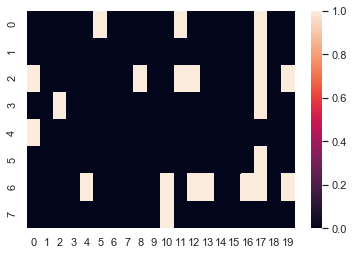

In [31]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

# biological process heatmap
ax = sns.heatmap(bp_matrix)
bp_matrix

array([[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])

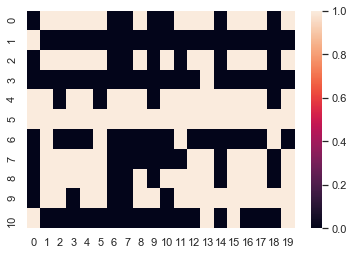

In [32]:
# compartment heatmap
ax = sns.heatmap(cc_matrix)
cc_matrix

In [33]:
list_of_data_objects

[         # GO  NS enrichment                               name  \
 0  GO:0006412  BP          e                        translation   
 1  GO:0006260  BP          p                    DNA replication   
 2  GO:0005829  CC          e                            cytosol   
 3  GO:0005840  CC          e                           ribosome   
 4  GO:0022625  CC          e  cytosolic large ribosomal subunit   
 5  GO:0005694  CC          p                         chromosome   
 
   ratio_in_study ratio_in_pop  p_uncorrected  depth  study_count  \
 0        73/1381      80/1997   2.811903e-06      7           73   
 1         9/1381      33/1997   7.305815e-07      6            9   
 2       657/1381     826/1997   1.224434e-17      2          657   
 3        36/1381      37/1997   3.568265e-05      5           36   
 4        20/1381      20/1997   9.366625e-04      5           20   
 5         0/1381       7/1997   2.594971e-04      5            0   
 
        p_fdr_bh                     